# Машинное обучение
ОмГТУ, Артём Шевляков

https://stepik.org/course/8057/syllabus

In [1]:
import pandas as pd
import numpy as np


## Введение в машинное обучение и основные понятия статистики, Восстановление пропущенных значений

In [21]:
P = pd.Series([-0,1,5])

print(round(P.mean(), 2))
print(round(P.median(), 2))

2.0
1.0


In [30]:
# Даны два вектора значений признаков Р1=(0,1,2) Р2=(2,1,0).
# Евклидово расстояние между ними равно
# Расстояние в метрике Манхэттен между ними равно
# Расстояние между ними в max-метрике равно 

Р1 = pd.Series([0,1,2]) 
Р2 = pd.Series([2,1,0])

evq = np.linalg.norm(Р1 - Р2)
manh = np.linalg.norm(Р1 - Р2,ord=1)
maxmetr = max(np.abs(Р1 - Р2))
print(round(evq, 2))
print(round(manh, 2))
print(round(maxmetr, 2))

2.83
4.0
2


In [31]:
# Дан вектор значений признака Р=(1,0,5,2,2). 
# Нормализуем этот вектор по формуле, использующей минимальное и максимальное значение признака Р. 
# Значение первой координаты нормализованного вектора будет равно 

a = np.array([1, 0, 5, 2, 2])

np.vectorize(lambda x: (x - a.min())/(a.max() - a.min()))(a)

array([0.2, 0. , 1. , 0.4, 0.4])

In [33]:
# Дан вектор значений признака Р=(1,0,5,2,2). 
# Нормализуем этот вектор по формуле, использующей среднее значением и отклонение признака Р. 
# Значение последней координаты нормализованного вектора будет равно 

a = np.array([1, 0, 5, 2, 2])
np.vectorize(lambda x: (x - a.mean())/a.std())(a)

array([-0.5976143 , -1.19522861,  1.79284291,  0.        ,  0.        ])

In [60]:
# Следующая таблица содержит информацию об оценках, выставленных фильмам.
# Требуется оценить, какую оценку поставит Саша фильму «Гарри Поттер». 
# Сделаем это с помощью метрики Манхэттен (для простоты вычислений данные в таблице нормировать не нужно). 
# Для этого подсчитаем расстояния от Саши до других людей, используя информацию из первых 3 столбцов. 
# Чему равна ожидаемая оценка для «Гарри Поттера» (округлить до одного знака после запятой)?

P1 = pd.Series([5,5,5,3])
P2 = pd.Series([5,3,4,4])
P3 = pd.Series([2,5,3,5])
P4 = pd.Series([3,4,4,None])

a = np.abs(P1[:3]-P4[:3]).sum()
b = np.abs(P2[:3]-P4[:3]).sum()
c = np.abs(P3[:3]-P4[:3]).sum()

print(a,b,c)

#print(np.floor((1/((1/a) + (1/b)+(1/c)))*((P1[3:4]/a)+(P2[3:4]/b)+(P3[3:4]/c))))
P4[3] = (1/(1/a + 1/b + 1/c)) * (P1[3]/a + P2[3]/b + P3[3]/c)
print(np.floor(P4[3]))

4.0 3.0 3.0
4.0


In [67]:
# Таблица содержит сведения о заказах анонимных пользователей в интернет-магазине. 
# По строкам отложены наименования товаров, а столбцы — номера заказов 
# (в ячейке стоит 1, если товар входит в соответствующий заказ; 0 — в противном случае). 
# При построении рекомендательной системы необходимо оценить степень похожести товаров с помощью вычисления евклидовой метрики. 
# Наиболее похожим (близким) на товар А будет товар С и расстояние между этими товарами равно (ответ округлить до сотых).


A = np.array([1,0,1,0,1,0])
B = np.array([0,1,1,1,0,0])
C = np.array([1,1,0,1,1,0])
D = np.array([1,1,0,1,1,1])

print(round(np.linalg.norm(A - C), 2))

1.73


## Поиск выбросов и аномалий

In [6]:
# Первая и третья квартиль значений признака Р равны 2, 4 соответственно. 
# Какие из следующих значений будут считаться выбросами?

interval_1 = 2 - 1.5 * (4 - 2)  #  Q25 - 1.5 * (Q75 - Q25)

interval_2 = 4 + 1.5 * (4 - 2)  #  Q75 + 1.5 *(Q75 - Q25)

print(interval_1, interval_2)

-1.0 7.0


In [8]:
# Среднее значение, отклонение и медиана десяти значений признака Р равны 10, 1.1 (одна целая одна десятая), и 9 соответственно. 
# Какие из следующих значений будут выбросами? Не забудьте в процессе решения проверить симметричность выборки.



# Если выборка семмитричная, то выброс за пределами интервала: 
#          (Среднее значение  - 3 * отклонение, Среднее значение  + 3 * отклонение)
# Если несеммитричная то (Среднее значение  - 5 * отклонение, Среднее значение  + 5 * отклонение)
# Если медиана и среднее близки друг к другу, то выборка считается семмитричной

mean_p = 10
median_p = 9
std_p = 1.1

interval_1 = (mean_p - 3 * std_p) 
interval_2 = (mean_p + 3 * std_p) 

print(interval_1, interval_2)

6.699999999999999 13.3


In [7]:
p = [7, 13.5, 6, 14, 13, 6.5]
n = 10
mean_p = 10
median_p = 9
std_p = 1.1

# проверка на симметричность
symm = 'симметрична' if abs(mean_p - median_p) <= 3 * std_p / n**.5 else 'несимметрична'
print('Выборка', symm)

# проверка по Шовене
from math import erfc
out_sh = []
for x in p:
    if erfc(abs(x - mean_p) / std_p) < 1 / (2 * n):
        out_sh.append(x)
print('\nвыбросы по Шовене:', *out_sh)

# проверка по квартилям
mult = 3 if symm == 'симметрична' else 5
left, right = mean_p - mult * std_p, mean_p + mult * std_p
out_q = []
for x in p:
    if not left <= x <= right:
        out_q.append(x)
print('\nвыбросы по квартилям:', *out_q)

Выборка симметрична

выбросы по Шовене: 7 13.5 6 14 13 6.5

выбросы по квартилям: 13.5 6 14 6.5


In [9]:
# В данной задаче выбросы будем искать по следующему правилу: 
# «Выбросом будет считаться объект, у которого суммарное расстояние от него до остальных объектов выборки наибольшее». 
# Таким образом, в указанной таблице выбросом будет (написать имя объекта в виде заглавной латинской буквы): 
# (при вычислении использовать метрику Манхэттен, нормализацию не проводить), 
# сумма расстояний от него до остальных объектов будет равна .

    
    def manhet(list1, list2, list3, list4):
    s = 0
    for a, b, c, d in zip(list1, list2, list3, list4):
        s += abs(a - b) + abs(a - c) + abs(a - d)
    return s

a = [1, 1, 0]
b = [0, 2, -1]
c = [2, 3, 1]
d = [1, 0, 4]

print('a:', manhet(a, b, c, d))
print('b:', manhet(b, c, d, a))
print('c:', manhet(c, b, a, d))
print('d:', manhet(d, b, c, a))

a: 12
b: 16
c: 16
d: 20


In [ ]:
# Кластеризация с помощью графов

# Первый способ:
import pandas as pd
from neulab.Clustering import CGraph
d = {'Age': [18, 33, 42, 24, 19, 25], 'Sex': [0, 1, 1, 0, 2, 2]}
df = pd.DataFrame(data=d, index=['A', 'B', 'C', 'D', 'E', 'F'])

clusters = CGraph(df, metric='manhattan', r='std', rnd=3, draw=False, info=True)

Output:
Distances: {'A|B': 1.125, 'A|C': 1.5, 'A|D': 0.25, 'A|E': 1.042, 'A|F': 1.292, 'B|C': 0.375, 'B|D': 0.875, 'B|E': 1.083, 'B|F': 0.833, 'C|B': 0.375, 'C|D': 1.25, 'C|E': 1.458, 'C|F': 1.208, 'D|B': 0.875, 'D|C': 1.25, 'D|E': 1.208, 'D|F': 1.042, 'E|B': 1.083, 'E|C': 1.458, 'E|D': 1.208, 'E|F': 0.25}
R = 0.388
Found clusters: [['D', 'A'], ['C', 'B'], ['E', 'F']]

# Второй способ через остовное дерево:

import pandas as pd
from neulab.Clustering import CGraphMST

d = {'Age': [18, 33, 42, 24, 19, 25], 'Sex': [0, 1, 1, 0, 2, 2]}
df = pd.DataFrame(data=d, index=['A', 'B', 'C', 'D', 'E', 'F'])

clusters = CGraphMST(df, clst_num=3, metric='manhattan', rnd=3, draw=True, info=True)

In [1]:
from math import sqrt
x, y = 36, 4
print(sqrt(x * y))
print(sqrt(x / y))
print(sqrt(x + y))
print(sqrt(x - y))

12.0
3.0
6.324555320336759
5.656854249492381


In [2]:
# Дана таблица, содержащая истинное значение целевого признака Y и предсказанное значение Y'.
# Значение MAE равно (ответ в виде десятичной дроби). Значение MAPE равно (количество процентов округлить до целого). %


import numpy as np
from sklearn.metrics import mean_absolute_error as mae

y = np.array([1,2,3,4,5,-1,-2,-3,-4,-5])
y_pred = np.array([0,2,2,5,3,-1,-1,-4,-6,-5])

def mape(y, y_pred): 
    return np.mean(np.abs((y - y_pred) / y)) * 100

print(mae(y, y_pred))
print(round(mape(y, y_pred)))


0.9
33


In [3]:
import numpy as np

def mae_mape(list1, list2):
    s = 0
    s1 = 0
    for i, j in zip(list1, list2):
        s += abs(i - j)
        s1 += abs(i - j) / abs(i)
    print('mae:', s / len(list1), '\n', 'mape:', (s1 / len(a)) * 100)

a = [1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
b = [0, 2, 2, 5, 3, -1, -1, -4, -6, -5]

mae_mape(a, b)

mae: 0.9 
 mape: 33.166666666666664


# Линейная регрессия
Объекты в следующей таблице имеют один нецелевой признак Х.
Построим модель линейно регрессии для предсказания признака Y.
Полученная модель будет иметь вид: Y=

In [9]:
import numpy as np

x = np.array([0,1,2,3])
y = np.array([0,1,0,3])

A = np.vstack([x, np.ones(len(x))]).T

w1, w0 = np.linalg.lstsq(A, y)[0]

w1, w0

(np.float64(0.7999999999999997), np.float64(-0.19999999999999904))

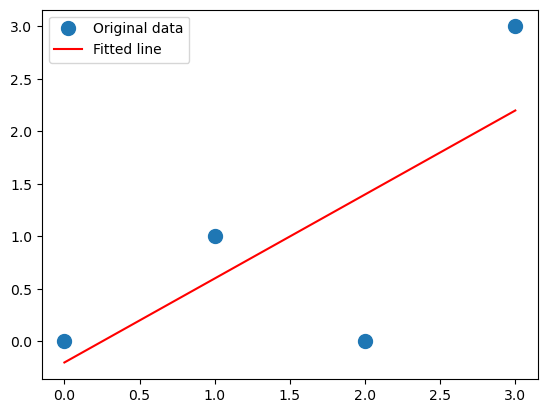

In [10]:
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, w1*x + w0, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [6]:
from sklearn import linear_model as lm

lr = lm.LinearRegression()
lr.fit([[0],[1],[2],[3]], [0,1,0,3])

print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

Intercept:  -0.19999999999999973
Coefficient:  [0.8]


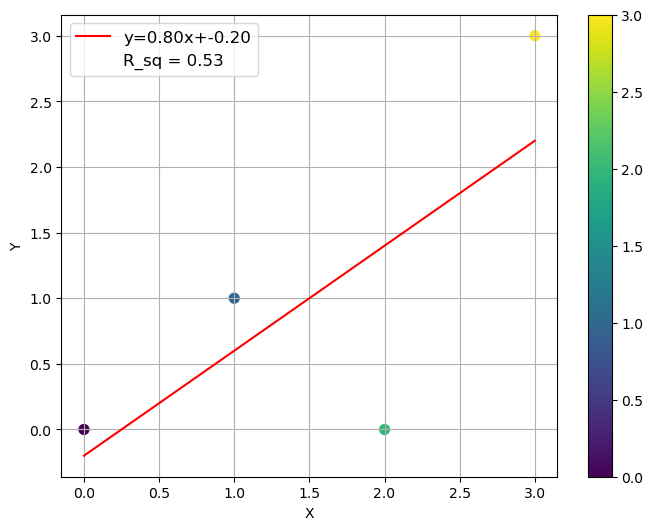

In [12]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# генерируем данные
x = [0, 1, 2, 3]
y = [0, 1, 0, 3]
x = np.array(x)
y = np.array(y)
numb=np.arange(0,len(x),1)


#линия регрессии
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept

#создание кроссплота
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

plt.scatter(x,y, s=50, c=numb)
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.plot([], [], ' ', label='R_sq = '+'{:.2f}'.format(r_value**2))

plt.grid(True)
plt.legend(fontsize=12)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [18]:
import sympy as sp

# Определяем переменную
x, y = sp.symbols('x , y')

# Задаём функцию
y = 2*x**2 -3*x*y+4*y**2-2*x+y+10

# Находим производную
dy_dx = sp.diff(y, x)

print("Производная:", dy_dx)

Производная: 4*x - 3*y - 2


In [19]:
# Объекты в следующей таблице имеют два нецелевых признака Х1, Х2.
# Проблема в том, что существует сильная (даже линейная) зависимость между признаками X1,X2.
# Построим модель линейной регрессии с регуляризацией для предсказания признака Y 
# (значение константы регуляризации С положить равным 1).

import numpy as np
from sklearn.linear_model import Ridge

X = np.array( [ [0,3], [1,2], [2,1], [3,0] ] )
y = np.array( [ 0, 1, 0, 3 ] )

#expand X by 1.0 column

X = np.insert(X, 0, values=1, axis=1 )

model = Ridge(alpha=1.0, fit_intercept=False )
model.fit(X, y )

print("coef:", model.coef_);

#  Полученная модель будет иметь вид: Y = 0.62 * Х1 + -0.1 * Х2 + 0.17

coef: [ 0.17391304  0.62450593 -0.1027668 ]


# Задачи классификации

In [30]:
# TP |  FP
# -------
# FN |  TN

def get_classification_parameters(TN, FP, FN, TP):

    Acc = (TN + TP) / (TN + TP + FN + FP)
    Preс = TP / (TP + FP)
    Rec = TP / (TP + FN)

    print(f'Accuracy: {Acc:.2f}\nPrecision: {Preс:.2f}\nRecall: {Rec:.2f}')

get_classification_parameters(TN=25,FP=10,FN=20,TP=15)

Accuracy: 0.57
Precision: 0.60
Recall: 0.43



 
|            |   0        | 1        | 
|------------|------------|----------|
|     0      |   TN       | FN       | 
|     1      |   FP       | TP       | 

In [33]:
# Один очень тупой классификатор С относит все объекты к классу 1. 
# Допустим,что выборка состоит из 50 объектов: 
# 20 из них действительно принадлежат классу 0, а 30 из них действительно принадлежат классу 1.

# 0 |  0
# -------
# 20 | 30

get_classification_parameters(TN=0,FP=20,FN=0,TP=30)

Accuracy: 0.60
Precision: 0.60
Recall: 1.00


# Метод k ближайших соседей (kNN)

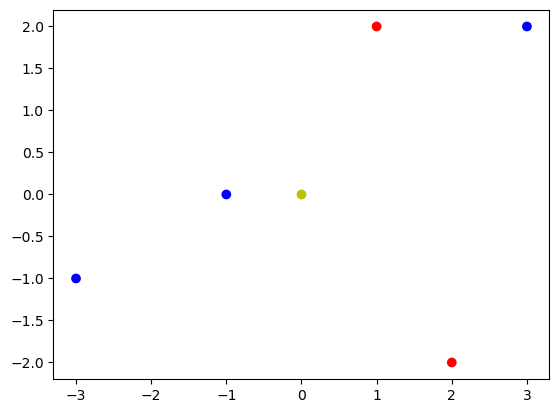

In [1]:
import matplotlib.pyplot as plt
plt.scatter([-1,1,2,-3,3],[0,2,-2,-1,2],color=["b","r","r","b","b"])
plt.scatter(0,0,color="y")

In [4]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

data = pd.DataFrame({'x1':[-1,1,2,-3,3], 'x2':[0,2,-2,-1,2], 'y':[1,0,0,1,1]}, index=['A','B','C','D','E'])

y_test = pd.DataFrame({'x1':[0],'x2':[0]})
 

X = data.drop(['y'], axis=1)
y = data.y

clf = KNeighborsClassifier(n_neighbors=5) #тут меняет количество соседей
clf.fit(X,y)

# после этого предсказываем данные на y_test
test_predicts = clf.predict(y_test)

test_predicts

array([1])

# Деревья решений

In [5]:
p1 = [0, 0, 1, 1, 0]
p2 = [1, 1, 1, 1, 1]
p3 = [0, 0, 0, 1, 1]
y = [1, 1, 1, 0, 0]

def gini(x, y) -> float:
    pr0 = []
    pr1 = []
    a = 0

    for i in range(len(x)):
        if x[i] == 0 : a += 1

    pr0.append(a/len(y))
    pr1.append((len(x) - a)/len(y))

    a = 0
    b = 0
    c = 0
    d = 0
    result = 0

    x0 = 0
    x1 = 0
    for i in range(len(x)):
        if x[i] == 0 and y[i] == 0: a += 1
        if x[i] == 0 and y[i] == 1: b += 1
        if x[i] == 1 and y[i] == 0: c += 1
        if x[i] == 1 and y[i] == 1: d += 1
        if x[i] == 0: x0 += 1    
        if x[i] == 1: x1 += 1

    if x0 == 0: 
        pr0.append(0) 
        pr0.append(0)
    else:
        pr0.append(a/x0) 
        pr0.append(b/x0)

    pr1.append(c/x1)
    pr1.append(d/x1)
   
    result = (pr0[0]*pr0[1]*pr0[2]) + (pr1[0]*pr1[1]*pr1[2])
    
    return(round(result, 2))    

print(gini(p1,y))
print(gini(p2,y))
print(gini(p3,y))

0.23
0.24
0.0
